In [388]:
import numpy as np
import pandas as pd
import random as rand
#from matplotlib.pylab import *
import matplotlib.pyplot as plt
# local module


from IPython.display import display # Allows the use of display() for DataFrames


# Pretty display for notebooks
#%matplotlib inline

# Load the dataset
in_file = 'set1.train'
full_data = pd.read_csv(in_file,delim_whitespace=True,header=None,usecols=[0,1,2],index_col=False)#remove extra coloumns
df = pd.DataFrame(full_data,dtype=np.float64)
#full_data = in_file.read().split(' ')
#full_data=np.genfromtxt(in_file, dtype=[('myfloat','f8'),('myfloat','f8'),('myfloat','f8')], delimiter=" ")
#display(full_data.head()) #x,y,label

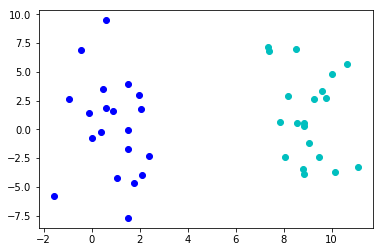

In [389]:
for x in df.itertuples():
    
    if x[3]>0: # if the response is not correct
        plt.plot(x[1], x[2], 'oc')
    else:
        plt.plot(x[1], x[2], 'ob')
plt.show()

Below is the Perceptron class. 
It converts the raw data into pandas dataframe therefore, the indices are shifted to the right

In [390]:
class Perceptron(object):
    """docstring for Perceptron"""
    def __init__(self):
        super(Perceptron, self).__init__()
#         if not hasattr(self,'w'):
        self.w =  np.random.rand(3) # weights
#         self.bias=rand.random()
        self.learningRate = 0.1

    def activate(self, x):
        """perceptron output"""
        y = self.w[0]+x[1] * self.w[1] + x[2] * self.w[2] # dot product between w and x
        
        if y>=0:
            return 1.0
        else:
            return 0.0

    def updateWeights(self, x, coefficient):
        """ 
        updates the weights,
        w(t+1) = w(t) + learningRate * error func * x
        
        """
        
#         x_vector= np.array(x[1],x[2],x[3])
        
        self.w[0]+= self.learningRate * coefficient #bias
        self.w[1] += self.learningRate * coefficient * x[1]
        self.w[2] += self.learningRate * coefficient * x[2]
        

    def train(self, data):
        """
        trains the vector in data.
        
        """
        self.w =  np.random.rand(3)
        learned = False
        steps = 0
        curr_error=0.0
        
        while not learned:
            sum_error = 0.0
            
            for x in data.itertuples(): # for each sample
                output = self.activate(x)
                if float(x[3]) != float(output): # if have a wrong response
                    #find misclassification
                    #actual class ? c1,c2 ---r
                    #desired class?c1 c2 --x[3] 
                    c1=1
                    c2=0
                    

                    curr_error_val = x[3]-output
                    sum_error+=abs(curr_error_val)#convergence     
                    
                    self.updateWeights(x, curr_error_val)
            steps += 1
            if sum_error==0 or steps >= 100: #finish learning
                print 'Finished learning in steps: %s' % steps
                if sum_error == 0:
                    print 'convergence'
                learned = True # stop learing
        print "Testing with training data:"
        test_Model(self,data)
        print "Testing with testing data:"
        test_Model(self,df_test)


In [391]:
test_file = 'set.test'
test_data = pd.read_csv(test_file, delimiter=' ',header=None,usecols=[0,1,2])#remove extra coloumns
df_test = pd.DataFrame(test_data,dtype=np.float64)

In [410]:

def test_Model(perc,test_dataframe):
    errorCount=0.0
    total=0.0
    for x in test_dataframe.itertuples():
#         print "X in test data:",x
        r = perc.activate(x)
        total+=1
        if r != x[3]: # if the response is not correct
            plt.plot(x[1], x[2], 'or')
            errorCount+=1
        elif r == 1:
            plt.plot(x[1], x[2], 'oc')
        elif r == 0:
            plt.plot(x[1], x[2], 'ob')
        
    n = np.linalg.norm(perc.w) # aka the length of p.w vector
    ww = perc.w / n # a unit vector
    ww1 = [-ww[0]/ww[1],0]
    ww2 = [0, -ww[0]/ww[2]]
    
    #plt.plot([ww1[0]+ww[0], ww2[0]-ww[0]], [ww1[1]+ww[0], ww2[1]-ww[0]], '--k')
    plt.plot([ww1[0],ww1[1]],[ww2[0],ww2[1]],'--k',linewidth=2.0)
    
    plt.show()
    errorRate = (errorCount/total)*100
    print "Error Rate =",errorRate,"%"

Finished learning in steps: 3
convergence
Testing with training data:


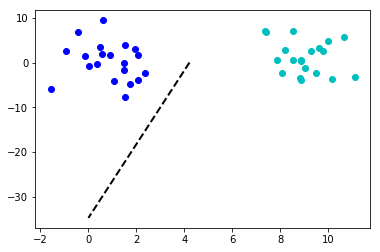

Error Rate = 0.0 %
Testing with testing data:


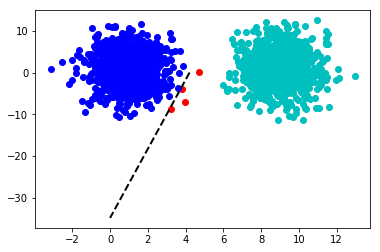

Error Rate = 0.2 %


In [413]:

def train_test_all_sets():
#     input_files={'set1.train','set2.train','set3.train','set4.train','set5.train','set6.train','set7.train','set8.train','set9.train','set10.train'}
    input_files={'set1.train'}
    
    for file_name in input_files:
        per = Perceptron()
        curr_data = pd.read_csv(file_name,delim_whitespace=True,header=None,usecols=[0,1,2],index_col=False)
        df_current_train = pd.DataFrame(curr_data,dtype=np.float64)
        per.train(df_current_train)
        
        
train_test_all_sets()

In [394]:
def plot_training_sets():
    input_files={'set1.train','set2.train','set3.train','set4.train','set5.train','set6.train','set7.train','set8.train','set9.train','set10.train'}
#     input_files={'set4.train'}
    
    for file_name in input_files:
        
        curr_data = pd.read_csv(file_name,delim_whitespace=True,header=None,usecols=[0,1,2],index_col=False)
        df_current_train = pd.DataFrame(curr_data,dtype=np.float64)
        for x in df_current_train.itertuples():
            if x[3]>0: # if the response is not correct
                plt.plot(x[1], x[2], 'oc')
            else:
                plt.plot(x[1], x[2], 'ob')
        plt.show()
        

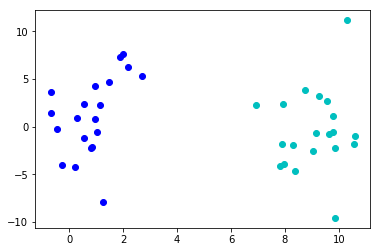

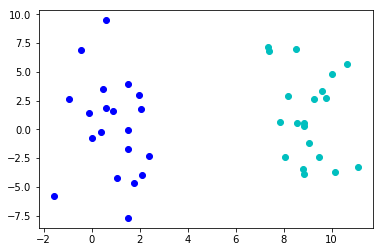

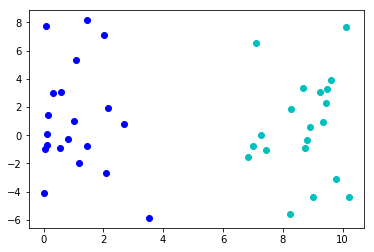

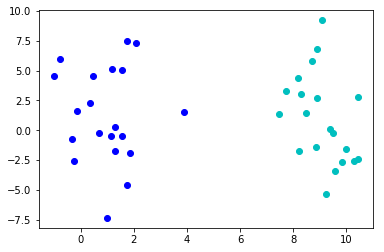

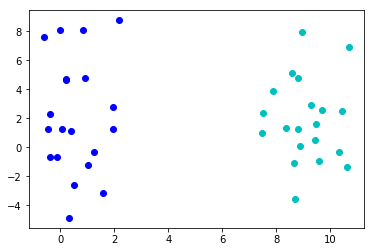

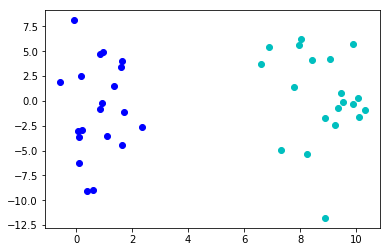

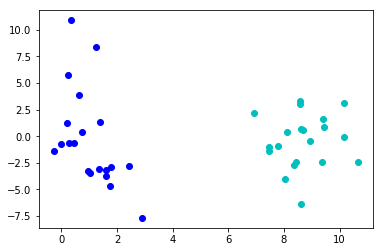

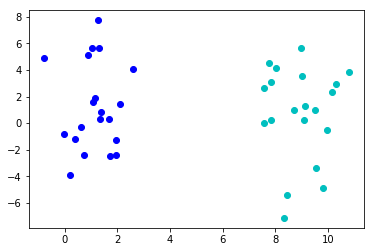

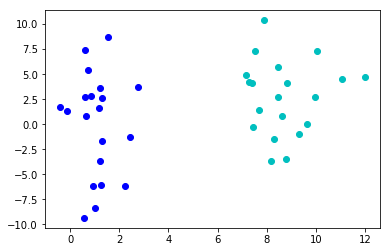

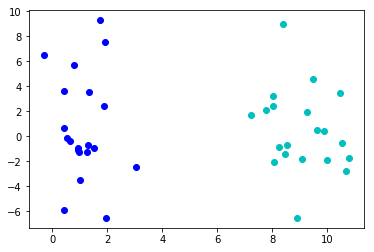

In [395]:

plot_training_sets()


